# WindTurbines

For a given wind turbine type and effective wind speed (WSeff), the `WindTurbines` object provides the power and thrust coefficient (CT), as well as the wind turbine hub height (H) and diameter (D).

### Predefined example WindTurbines

PyWake contains a few predefined turbines, e.g. the V80 from Hornsrev1, the 3.35MW from IEA task 37, the DTU10MW.

In [0]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from py_wake.wind_turbines import WindTurbines, OneTypeWindTurbines
from py_wake.examples.data.hornsrev1 import V80
from py_wake.examples.data.iea37 import IEA37_WindTurbines, IEA37Site
from py_wake.examples.data.dtu10mw import DTU10MW


v80 = V80()
iea37 = IEA37_WindTurbines()
dtu10mw = DTU10MW()


### Import from WAsP wtg files

In [2]:
from py_wake.examples.data import wtg_path
wtg_file = os.path.join(wtg_path, 'NEG-Micon-2750.wtg')
neg2750 = WindTurbines.from_WAsP_wtg(wtg_file)

### User-defined WindTurbines

In [3]:

u = [0,3,12,25,30]
ct = [0,8/9,8/9,.3, 0]
power = [0,0,2000,2000,0]

my_wt = OneTypeWindTurbines(name='MyWT',
                           diameter=123,
                           hub_height=321,
                           ct_func=lambda ws : np.interp(ws, u,ct),
                           power_func=lambda ws : np.interp(ws, u,power),
                           power_unit='kW')


In [4]:
wts = WindTurbines.from_WindTurbines([v80,iea37,dtu10mw,my_wt,neg2750])

In [5]:
types = range(5)
print ("Name:\t\t%s" % "\t".join(wts.name(types)))
print('Diameter[m]\t%s' % "\t".join(map(str,wts.diameter(types))))
print('Hubheigt[m]\t%s' % "\t".join(map(str,wts.hub_height(types))))

Name:		V80	3.35MW	DTU10MW	MyWT	NEG-Micon 2750/92 (2750 kW)
Diameter[m]	80.0	130.0	178.3	123.0	92.0
Hubheigt[m]	70.0	110.0	119.0	321.0	70.0


#### Power curve

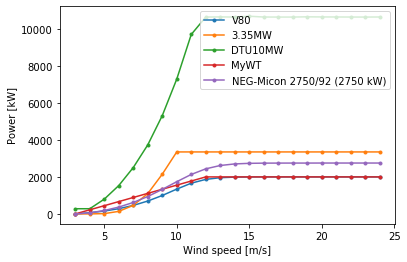

In [6]:
ws = np.arange(3,25)
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Power [kW]')
for t in types:
    plt.plot(ws, wts.power(ws, t)*1e-3,'.-', label=wts.name(t))
plt.legend(loc=1)

#### CT curve

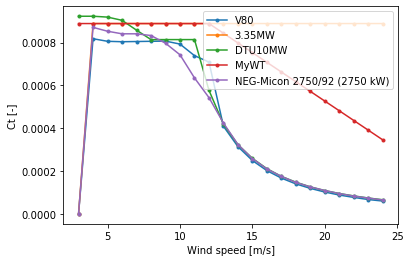

In [7]:
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Ct [-]')
for t in types:
    plt.plot(ws, wts.ct(ws, t)*1e-3,'.-', label=wts.name(t))
plt.legend(loc=1)

### Plot

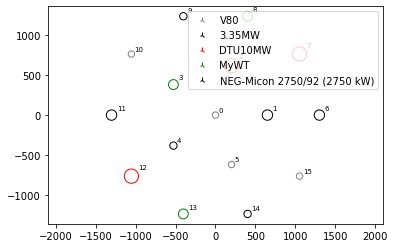

In [8]:
from py_wake.examples.data.hornsrev1 import Hornsrev1Site
s = IEA37Site(16)
x,y = s.initial_position.T
wts.plot(x,y,types=np.arange(len(x))%len(types))